# TD6 Python

## 1. Install Tensorflow

In [1]:
#!pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## 2 & 3. Load and return the fashion_mnist dataset from keras.datasets & Split the data into training and testing data.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)= fashion_mnist.load_data()

In [3]:
print("train image:\n", train_images)
print("\ntrain labels:\n", train_labels)

train image:
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]

train labels:
 [9 0 0 ... 3 0 5]


In [4]:
print("train image's shape: ",train_images.shape)
print("train labels' shape: ",train_labels.shape)
print("test image's shape: ",test_images.shape)
print("test labels' shape: ",test_labels.shape)

train image's shape:  (60000, 28, 28)
train labels' shape:  (60000,)
test image's shape:  (10000, 28, 28)
test labels' shape:  (10000,)


## 4. Define a list of the class names and pre-process images.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Comprehension of the dataset

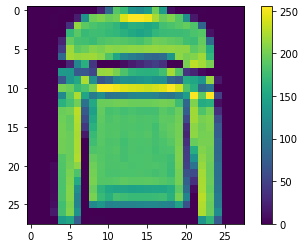

In [6]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

#### The pixel values fall in the range of 0 to 255
#### We will scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, we divide the values by 255. 

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

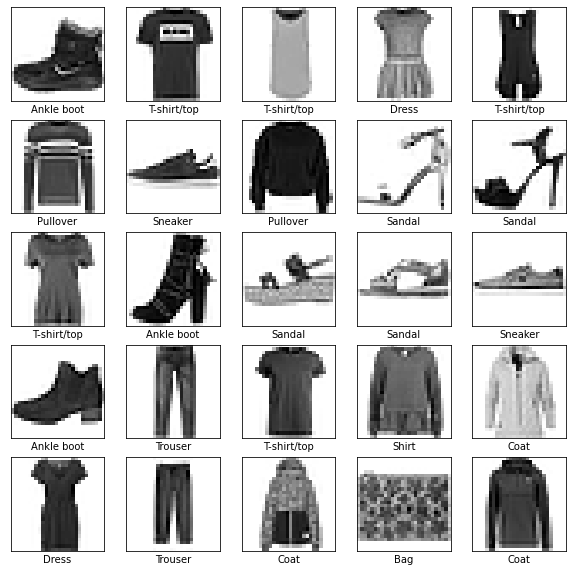

In [8]:
plt.figure(figsize=(10,10))
for i in range(25): # We show 25 images
    plt.subplot(5,5,i+1)
    plt.xticks([]) # Get or set the current tick locations and labels of the x-axis
    plt.yticks([]) # Get or set the current tick locations and labels of the y-axis
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 5. Create a neural network model

#### Building the neural network requires configuring the layers of the model, then compiling the model.
#### The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.
#### Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### tf.keras.layers.flatten
####  tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

### tf.keras.layers.Dense
#### the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model
#### Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

#### Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
#### Optimizer —This is how the model is updated based on the data it sees and its loss function.
#### Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Optimizer that implements the Adam algorithm. The Adam optimization algorithm is an extension to stochastic gradient descent.
#### tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) : Computes the crossentropy loss between the labels and predictions.
#### metrics: Calculates how often predictions equal labels.

## 6. Train the model


#### Training the neural network model requires the following steps:

#### 1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
#### 2. The model learns to associate images and labels.
#### 3. You ask the model to make predictions about a test set—in this example, the test_images array.
#### 4. Verify that the predictions match the labels from the test_labels array.

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5026 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3767 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.3383 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.3150 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 2s 819us/step - loss: 0.2976 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 2s 884us/step - loss: 0.2834 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.2704 - accuracy: 0.8988
Epoch 8/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.2610 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 2s 859us/step - loss: 0.2495 - accuracy: 0.9059
Epoch 10/10
1875/1875 [==============================] - 2s 822us/st

## 7. Test the model


In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3428 - accuracy: 0.8811 - 320ms/epoch - 1ms/step

Test accuracy: 0.8810999989509583


#### The accuracy is lower when we test the model. So we can guess that the model was overfit

## 8. Analyze the results : predict, calculate the loss, plot the first X test images, their predicted labels, and the true labels, color correct predictions in blue and incorrect predictions in red.

### Make predictions

#### With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [13]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

#### Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [15]:
predictions[0]

array([3.8809867e-07, 1.0865605e-09, 2.0603825e-07, 2.0415147e-08,
       8.8660208e-09, 7.5714350e-05, 3.1270092e-06, 2.8487941e-02,
       1.1760101e-07, 9.7143251e-01], dtype=float32)

#### The 10 numbers represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [16]:
np.argmax(predictions[0])

9

#### So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [17]:
test_labels[0]

9

#### Graph this to look at the full set of 10 class predictions

In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

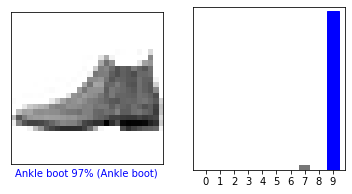

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

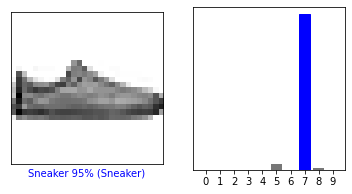

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

#### Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

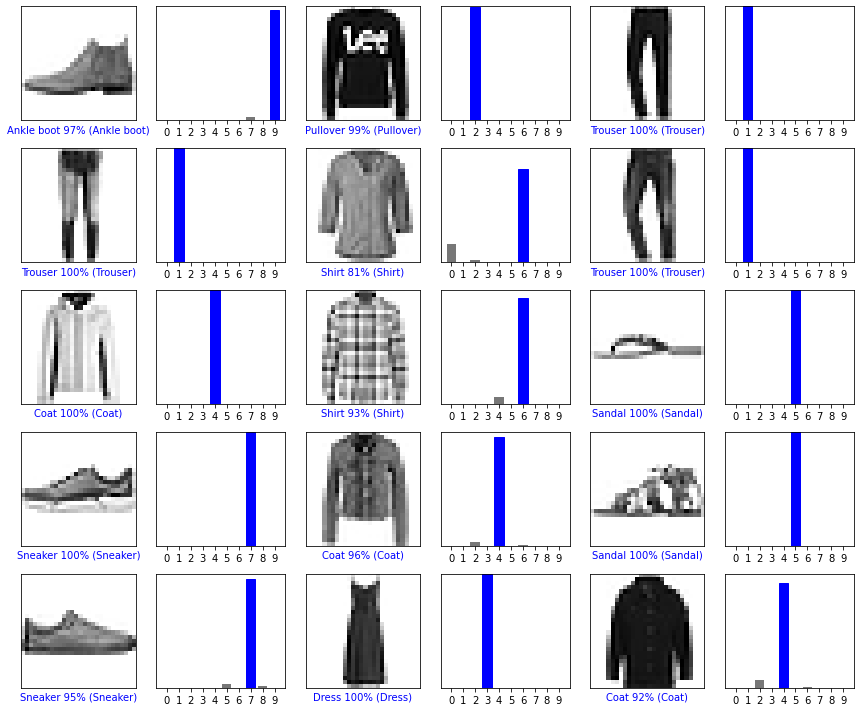

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use the trained model

#### Finally, use the trained model to make a prediction about a single image.

In [22]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


#### tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [23]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


#### tf.keras.Model.predict: returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch
#### Predict the correct label for this image:

In [24]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.0873447e-07 1.5405185e-16 9.9472129e-01 6.4402100e-10 4.9858326e-03
  1.0145418e-11 2.9232830e-04 6.0015650e-24 2.1464459e-11 4.9802068e-14]]


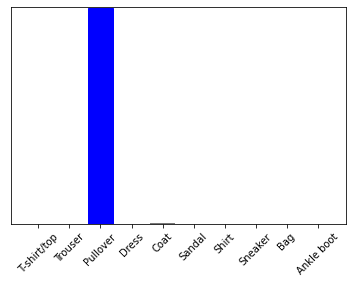

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [26]:
np.argmax(predictions_single[0])

2